In [992]:
from pandas import read_csv
from matplotlib.pyplot import pie , show ,legend , title
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay ,confusion_matrix 
scaler = StandardScaler()
encoder = LabelEncoder()

In [993]:
file = read_csv("D:\\datasets\\apple_quality\\apple_quality.csv")
df = file.copy()
df.sample(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
2699,2699.0,-3.781481,-1.136858,4.467151,-0.091726,0.809747,0.005770,-1.410296641,good
764,764.0,-2.814610,-0.944456,0.319110,0.683216,2.219503,1.042943,-1.15563525,good
1971,1971.0,-2.377711,0.231443,-1.389540,-0.690197,0.903694,2.408731,-0.82719456,bad
1808,1808.0,-3.228958,0.813327,0.611731,0.056863,2.024405,-0.947052,-3.556199706,good
2913,2913.0,1.232188,-1.714367,-1.050560,2.263293,2.149320,-1.609701,1.68390841,good
1123,1123.0,-1.975302,0.148919,-2.065254,0.971762,1.009978,-1.996484,-1.310787649,good
1756,1756.0,-2.160043,-0.505210,-1.273401,2.283968,0.429886,1.646340,1.663726188,bad
3161,3161.0,-1.994719,0.459086,-1.078758,0.677493,0.283108,0.336913,-0.813438826,bad
2186,2186.0,-3.082671,-1.780317,0.474989,2.032589,1.006848,1.328555,4.034392859,bad
1418,1418.0,-0.584733,-1.159163,0.811467,2.244678,0.509463,2.273860,3.091904815,good


In [994]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [995]:
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [996]:
df = df.dropna()
df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

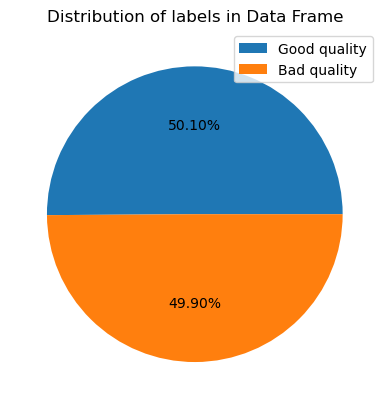

In [997]:
good = []
pie([df.Quality.to_list().count('good'),df.Quality.to_list().count('bad')],autopct='%1.2f%%')
legend(['Good quality','Bad quality'])
title('Distribution of labels in Data Frame')
show()

In [998]:
lbl = df.Quality
encoded_lbl = encoder.fit_transform(lbl)
df = df.drop(['Quality','A_id'],axis=1)

In [999]:
scaled_df = scaler.fit_transform(df)

In [1000]:
xtr , xts , ytr , yts = train_test_split(scaled_df,encoded_lbl,test_size=0.1,random_state=42)

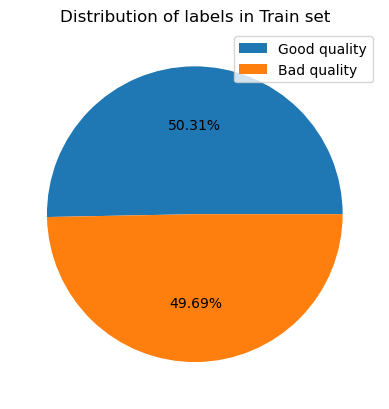

In [1001]:
pie([ytr.tolist().count(1),ytr.tolist().count(0)],autopct='%1.2f%%')
legend(['Good quality','Bad quality'])
title('Distribution of labels in Train set')
show()

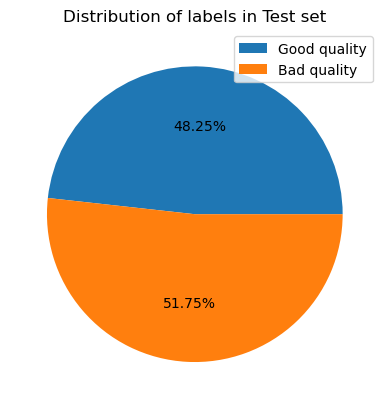

In [1002]:
pie([yts.tolist().count(1),yts.tolist().count(0)],autopct='%1.2f%%')
legend(['Good quality','Bad quality'])
title('Distribution of labels in Test set')
show()

In [1003]:
print(f'Train set size: {len(xtr)}\nTest set size: {len(xts)}')

Train set size: 3600
Test set size: 400


In [1004]:
model = RandomForestClassifier()
model.fit(xtr,ytr)
print('Accuracy on train set:')
model.score(xtr,ytr)*100

Accuracy on train set:


100.0

In [1005]:
print('Accuracy on test set:')
model.score(xts,yts)*100

Accuracy on test set:


90.75

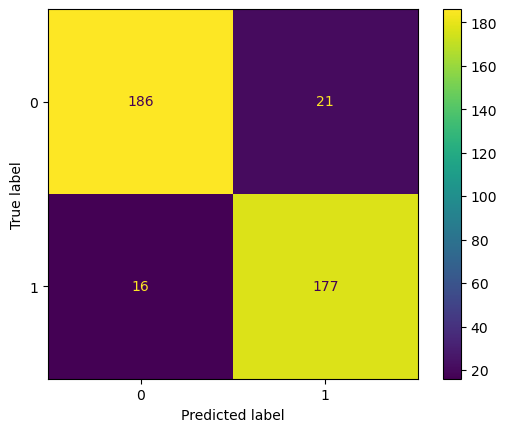

In [1006]:
pred = model.predict(xts)
con_mtrx = confusion_matrix(yts,pred)
display = ConfusionMatrixDisplay(con_mtrx)
display.plot()
show()

In [1007]:
print('Accuracy on total data:')
model.fit(scaled_df,encoded_lbl)
model.score(scaled_df,encoded_lbl)*100

Accuracy on total data:


100.0